In [3]:
import sys
import dlib
from skimage import io
import numpy as np
import cv2
import matplotlib.pylab as plt
import math

In [7]:
def arc_points(point1, point2, num_of_points):
    points = []
    center_x = (point1[0] + point2[0])/2
    center_y = (point1[1] + point2[1])/2
    radius = abs((point1[0] - point2[0])/2)
    for i in range(num_of_points):
        if i == 0:
            continue
    
        point = []
        x = center_x + radius * math.cos(math.pi + i * math.pi / num_of_points)
        y = center_y + radius * math.sin(math.pi + i * math.pi / num_of_points)
        point.append(x)
        point.append(y)
        
        points.append(point)
    
    return points


def get_landmarks(img):
    dets = detector(img, 1)
    landmarks = np.zeros((34, 2))
    for k, d in enumerate(dets):
        shape = predictor(img, d)
        for i in range(17):
            landmarks[i] = (shape.part(i).x, shape.part(i).y)
        
        point1 = [shape.part(0).x, shape.part(0).y]
        point2 = [shape.part(16).x, shape.part(16).y]
        points = arc_points(point1, point2, 18)
        for i in range(len(points)):
            landmarks[33 - i] = (points[i][0], points[i][1])
    
    return landmarks


def inside(X,Y,Region): 
    j=len(Region)-1
    flag=False
    for i in range(len(Region)):
        if (Region[i][1]<Y and Region[j][1]>=Y or Region[j][1]<Y and Region[i][1]>=Y):  
            if (Region[i][0] + (Y - Region[i][1]) / (Region[j][1] - Region[i][1]) * (Region[j][0] - Region[i][0]) < X):
                flag =not flag
        j=i
    return flag

In [18]:
detector = dlib.get_frontal_face_detector() 
# the .dat file can be downloaded following this link:
# https://sourceforge.net/projects/dclib/files/dlib/v18.10/shape_predictor_68_face_landmarks.dat.bz2/download
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') 
path = 'emotion.jpg'
img = io.imread(path)
region = get_landmarks(img)
shape = list(img.shape) 
cropped_img = img.copy()
for i in range(shape[0]):
    for j in range(shape[1]):
        if not inside(j, i, region): 
            cropped_img[i, j] = (img[0,0][0], img[0,0][1], img[0,0][2]) # the RGB values of the background


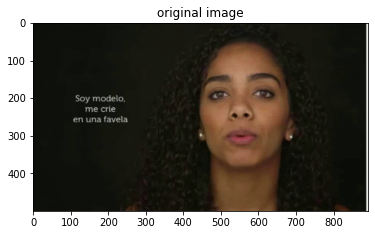

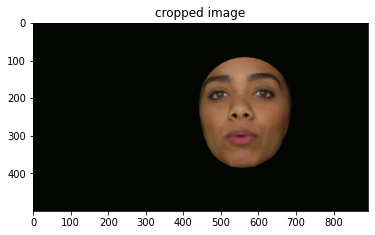

In [21]:
i = 'emotion'
plt.imshow(img)
plt.title('original image')
plt.show()
plt.imshow(cropped_img)
plt.title('cropped image')
plt.show()

In [22]:
cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)


In [23]:
cv2.imwrite('c_frames/{}c.jpg'.format(path), cropped_img)

True